Q.1)The Manning’s roughness n is often determined empirically. To determine these coefficients for a concrete surface, an experiment was conducted in a 3 m wide trapezoidal flume with side slope 2H:1V. The uniform flow depth measured at different discharges are given below.

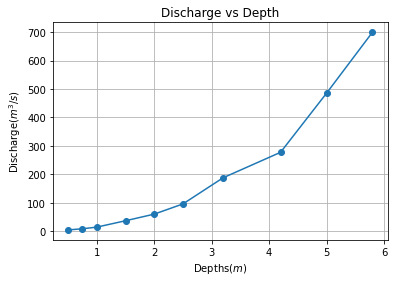

In [29]:
#a
import matplotlib.pyplot as plt
y1=[0.5,0.75,1,1.5,2,2.5,3.2,4.2,5,5.8]
q=[4.11,8.1,13.97,36.41,59.7,95.6,187.75,277.38,485.28,700]
plt.plot(y1,q,marker="o")
plt.xlabel('Depths$(m)$')
plt.ylabel('Discharge$(m^3/s)$')
plt.title('Discharge vs Depth')
plt.savefig('q1_a.png')
plt.grid()
plt.show()


The value of longnitudinal Slope is : 0.0084
The value manning roughness coefficient is : 0.01856


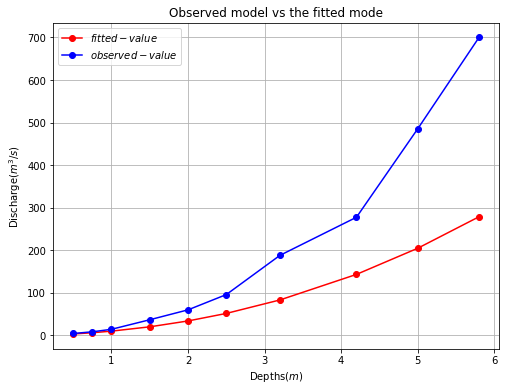

In [30]:
import scipy.optimize as optimize
b,m=3,2
for i in range(len(y1)):

  def f(x):
    Q=q[i]
    y=y1[i]
    
    n,So = x 
    equation = Q-(((b+2*m*y)*y)**(5/3))*(So**(1/2))/(n*(b+2*y*((1+m**2)**(1/2))**(2/3)))
    
    return equation

  initial_guess = [0.012, 1/800]
  result = optimize.minimize(f, initial_guess)
print('The value of longnitudinal Slope is :',round(result.x[0],4))
print('The value manning roughness coefficient is :',round(result.x[1],5))
Q2=[]
for j in range(len(y1)):
  So=0.002
  Q=((b*y1[j]+m*y1[j]**2)**(5/3))*result.x[0]**(1/2)/(result.x[1]*(b+2*y1[j]*(1+m**2)**(1/2))) 
  Q2.append(Q)
plt.figure(figsize=(8,6))
plt.plot(y1,Q2,color='r',marker="o",label='$fitted-value$')
plt.plot(y1,q,color='b',marker="o",label='$observed-value$')
plt.title('Observed model vs the fitted mode')
plt.xlabel('Depths$(m)$')
plt.ylabel('Discharge$(m^3/s)$')
plt.savefig('q1_b.png')
plt.grid()
plt.legend()
plt.show()

The value of mannings roughness coefficient n for So=0.002 is 0.0104


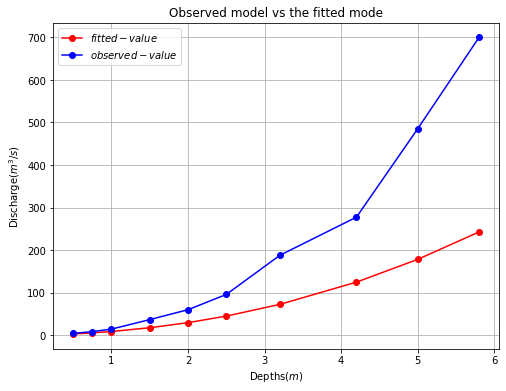

In [31]:
#c
from scipy.optimize import minimize,newton
b,m=3,2
n1=[]
for i in range(len(y1)):
  Q=q[i]
  y=y1[i]
  def objective(n):
    So=0.002
    equation = ((n*Q/(So**.5*((b+(m*y)+(m*y))*(y/2))))**1.5)-((b+(m*y)+(m*y))/(b + m*((1+m**2)**.5)*y + m*((1+m**2)**.5)*y))
    
    return equation

  solution=newton(objective,1)
  n1.append(solution)
print('The value of mannings roughness coefficient n for So=0.002 is',round(max(n1),4))
Q2=[]
for j in range(len(n1)):
  So=0.002
  Q=((b*y1[j]+m*y1[j]**2)**(5/3))*So**(1/2)/(max(n1)*(b+2*y1[j]*(1+m**2)**(1/2))) 
  Q2.append(Q)
plt.figure(figsize=(8,6))
plt.plot(y1,Q2,color='r',marker="o",label='$fitted-value$')
plt.plot(y1,q,color='b',marker="o",label='$observed-value$')

plt.title('Observed model vs the fitted mode')
plt.xlabel('Depths$(m)$')
plt.ylabel('Discharge$(m^3/s)$')
plt.savefig('q1_c.png')
plt.grid()
plt.legend()
plt.show()

Question 2.

Write a general program for Thiessen Polygon analysis and use it to solve the following problems.

a. Consider a rectangular area with vertices ([0,0],[10,0],[10,10] & [0,10]). For the gages given in Table 1, estimate (a) Thiessen weights, (b) average rainfall using Thiessen weights, and (c) average rainfall using arithmetic average. Plot the area, gages and associated Thiessen polygons on a figure.

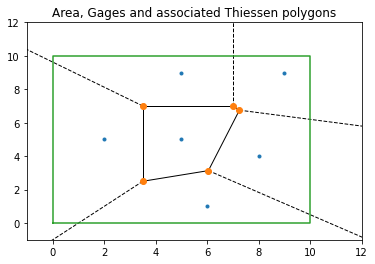

Thiessen weights area as follows
Area of Polygon 0 :  10.75
Area of Polygon 1 :  16.295454545454547
Area of Polygon 2 :  17.488636363636363
Area of Polygon 3 :  26.1875
Area of Polygon 4 :  16.1875
Area of Polygon 5 :  13.09090909090909
Sum of the total area is: 100.0
Average rainfall using Thiessen weights is: 7.56625 mm
Average rainfall using arithmetic average: 7.3333 mm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


In [32]:
#1
import matplotlib.pyplot as plt
import numpy as np
A=[0,10,10,0,0]
B=[0,0,10,10,0]
rainfall=[8,7,2,10,12,5]
points = np.array([[2,5],[8,4],[5,5],[5,9],[6,1],[9,9]])
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import MultiPoint, Point, Polygon
vor = Voronoi(points)
from scipy import *
import matplotlib.pyplot as plt
fig=voronoi_plot_2d(vor,lim=(0,10))
plt.plot(A,B)
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.title('Area, Gages and associated Thiessen polygons')
plt.savefig('q2_a.png')
plt.show()
vertex=vor.vertices
x_cords1 = [7,10,10,vertex[-2][0],7]
y_cords1 = [10,10,6,vertex[-2][1],7]
x_cords2=[vertex[-2][0],10,10,vertex[-1][0]]
y_cords2=[vertex[-2][1],6,0.5,vertex[-1][1]]
x_cords3=[vertex[-1][0],10,10,1,vertex[0][0]]
y_cords3=[vertex[-1][1],0.5,0,0,vertex[0][1]]
x_cords4=[1,0,0,vertex[1][0],vertex[0][0]]
y_cords4=[0,0,9.75,vertex[1][1],vertex[0][1]]
x_cords5=[0,0,7,7,vertex[1][0]]
y_cords5=[9.75,10,10,7,vertex[1][1]]
x_cords6=[]
y_cords6=[]
for k in range(0,5):
  x=vertex[k][0]
  y=vertex[k][1]
  x_cords6.append(x)
  y_cords6.append(y)
xcor=[x_cords1,x_cords2,x_cords3,x_cords4,x_cords5,x_cords6]
ycor=[y_cords1,y_cords2,y_cords3,y_cords4,y_cords5,y_cords6]
area1=[]
print('Thiessen weights area as follows')
for i in range(0,6):
  n = len(xcor[i])
  x_cords = xcor[i]
  y_cords = ycor[i]
  area = 0
  for x in range(n-2):
      v1,v2,v3 = 0,x+1,x+2
      tr_area = abs(0.5*(x_cords[v1]*(y_cords[v2]-y_cords[v3])+
                     x_cords[v2]*(y_cords[v3]-y_cords[v1])+
                     x_cords[v3]*(y_cords[v1]-y_cords[v2])))
      area += tr_area
  area1.append(area)
  print ("Area of Polygon",i,": ",area)
print('Sum of the total area is:',sum(area1))
r=[]
for j in range(0,6):
  rain=rainfall[j]*area1[j]
  r.append(rain)
print('Average rainfall using Thiessen weights is:',sum(r)/sum(area1),'mm')
print('Average rainfall using arithmetic average:',round(np.average(rainfall),4),'mm')

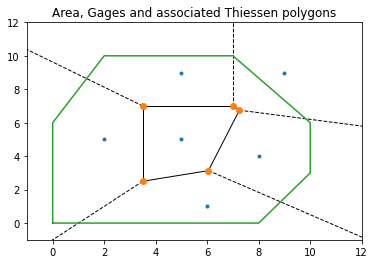

Thiessen weights area as follows
Area of Polygon 1 :  4.0
Area of Polygon 2 :  14.392045454545457
Area of Polygon 3 :  16.642045454545453
Area of Polygon 4 :  23.5
Area of Polygon 5 :  15.375
Area of Polygon 6 :  13.09090909090909
Sum of the total area is: 87.0
Average rainfall using Thiessen weights is: 7.4826 mm
Average rainfall using arithmetic average: 7.3333 mm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


In [33]:
#2.
loc=[[0,0],[8,0],[10,3], [10,6], [7,10], [2,10],[0,6]]
x=[]
y=[]
for i in range(0,7):
  x1=loc[i][0]
  y1=loc[i][1]
  x.append(x1)
  y.append(y1)
x.append(0)
y.append(0)

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import MultiPoint, Point, Polygon
vor = Voronoi(points)
from scipy import *
import matplotlib.pyplot as plt
fig=voronoi_plot_2d(vor,lim=(0,10))
plt.plot(x,y)
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.savefig('q2_b.png')
plt.title('Area, Gages and associated Thiessen polygons')
plt.show()
vertex=vor.vertices
x_cords1 = [7,9.5,vertex[-2][0],7]
y_cords1 = [10,6.5,vertex[-2][1],7]
x_cords2=[vertex[-2][0],9.5,10,10,9,vertex[-1][0]]
y_cords2=[vertex[-2][1],6.5,6,3,1.75,vertex[-1][1]]
x_cords3=[vertex[-1][0],9,8,1,vertex[0][0]]
y_cords3=[vertex[-1][1],1.75,0,0,vertex[0][1]]
x_cords4=[1,0,0,1,vertex[1][0],vertex[0][0]]
y_cords4=[0,0,6,8.5,vertex[1][1],vertex[0][1]]
x_cords5=[1,2,7,7,vertex[1][0]]
y_cords5=[8.5,10,10,7,vertex[1][1]]
x_cords6=[]
y_cords6=[]
for k in range(0,5):
  x=vertex[k][0]
  y=vertex[k][1]
  x_cords6.append(x)
  y_cords6.append(y)
xcor=[x_cords1,x_cords2,x_cords3,x_cords4,x_cords5,x_cords6]
ycor=[y_cords1,y_cords2,y_cords3,y_cords4,y_cords5,y_cords6]
area1=[]
print('Thiessen weights area as follows')
for i in range(0,6):
  n = len(xcor[i])
  x_cords = xcor[i]
  y_cords = ycor[i]
  area = 0
  for x in range(n-2):
      v1,v2,v3 = 0,x+1,x+2
      tr_area = abs(0.5*(x_cords[v1]*(y_cords[v2]-y_cords[v3])+
                     x_cords[v2]*(y_cords[v3]-y_cords[v1])+
                     x_cords[v3]*(y_cords[v1]-y_cords[v2])))
      area += tr_area
  area1.append(area)
  print ("Area of Polygon",i+1,": ",area)
print('Sum of the total area is:',sum(area1))
r=[]
for j in range(0,6):
  rain=rainfall[j]*area1[j]
  r.append(rain)
print('Average rainfall using Thiessen weights is:',round(sum(r)/sum(area1),4),'mm')
print('Average rainfall using arithmetic average:',round(np.average(rainfall),4),'mm')

Question 3

Write a program that reads location of rainfall stations from a file and do the following. a. Find the distance between each pair of points b. Locate the nearest neighbor for each point and estimate the corresponding distance. c. Locate the farthest neighbor for each point and estimate the corresponding distance. d. Apply your function to the attached data

The program should read data from a CSV file (example attached file) and write output in another CSV file having the following eight columns:

In [34]:
from google.colab import files
uploaded = files.upload()

Saving rainfall_stations.csv to rainfall_stations.csv


In [35]:
pip install haversine

In [40]:
import pandas as pd
import math
df=pd.read_csv('rainfall_stations.csv')
df

,ID,lat,lon
0,1,26.87,83.01
1,2,27.69,82.38
2,3,26.91,84.75
3,4,27.43,83.19
4,5,25.30,80.47
5,6,27.14,82.45
6,7,26.23,83.24
7,8,25.24,82.07
8,9,27.36,82.43
9,10,28.62,81.28


In [46]:
import haversine as hs
import numpy as np
dis=[]
for j in range(len(df['ID'])):
  dis1=[]
  for i in range(len(df['ID'])):
    
    if df['ID'][j]==df['ID'][i]:
      None
    else:
      loc1 = (df['lat'][j], df['lon'][j])
      loc2 = (df['lat'][i],df['lon'][i])
      h_dist = hs.haversine(loc1, loc2)
    dis1.append(h_dist)
  dis.append(dis1)
tr=np.transpose(dis)
print('the distance between each pair of points are',tr)

df['nearest_neighbor_ID']=np.nan
df['nearest_neighbor_lon']=np.nan
df['nearest_neighbor_lat']=np.nan
for m in range(len(df['ID'])):
  distance=min(tr[m])
  loc=np.where(tr[m]==distance)[0][0]
  ID=df['ID'][loc]
  df['nearest_neighbor_ID'][m]=ID
  df['nearest_neighbor_lon'][m]=(df['lon'][loc])
  df['nearest_neighbor_lat'][m]=(df['lat'][loc])

df['nearest_distance']=np.nan
for k in range(len(df['ID'])):
  distance=min(dis[k])
  df['nearest_distance'][k]=distance
df['farthest_neighbor_ID']=np.nan
df['farthest_neighbor_lon']=np.nan
df['farthest_neighbor_lat']=np.nan
for m in range(len(df['ID'])):
  distance=max(tr[m])
  loc=np.where(tr[m]==distance)[0][0]
  ID=df['ID'][loc]
  df['farthest_neighbor_ID'][m]=ID
  df['farthest_neighbor_lon'][m]=(df['lon'][loc])
  df['farthest_neighbor_lat'][m]=(df['lat'][loc])
df['farthest_distance']=np.nan
for k in range(len(df['ID'])):
  distance=max(dis[k])
  df['farthest_distance'][k]=distance
df


the distance between each pair of points are [[179.94110108 110.40898602 172.61571194  64.76605131 307.92054534
   63.08215169  74.75174215 204.12535733  79.14520741 258.54689496]
 [110.40898602 110.40898602 249.71840246  84.92022073 326.71967106
   61.54636713 183.35801563 274.16958487  37.02413261 149.40945735]
 [172.61571194 249.71840246 249.71840246 164.79825297 463.30831266
  229.25064626 168.13136797 325.76055941 234.96417307 390.76907715]
 [ 64.76605131  84.92022073 164.79825297 164.79825297 359.8809996
   79.92297497 133.52629106 267.87210887  75.4336576  229.46576826]
 [307.92054534 326.71967106 463.30831266 359.8809996  359.8809996
  284.36806913 296.02884372 161.02434736 301.02488138 377.79144145]
 [ 63.08215169  61.54636713 229.25064626  79.92297497 284.36806913
  284.36806913 128.05855725 214.64550526  24.54268125 200.76318847]
 [ 74.75174215 183.35801563 168.13136797 133.52629106 296.02884372
  128.05855725 128.05855725 160.78579346 149.1687479  328.69169772]
 [204.125357

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to b

,ID,lat,lon,nearest_neighbor_ID,nearest_neighbor_lon,nearest_neighbor_lat,nearest_distance,farthest_neighbor_ID,farthest_neighbor_lon,farthest_neighbor_lat,farthest_distance
0,1,26.87,83.01,6.0,82.45,27.14,63.082152,5.0,80.47,25.30,307.920545
1,2,27.69,82.38,9.0,82.43,27.36,37.024133,5.0,80.47,25.30,326.719671
2,3,26.91,84.75,4.0,83.19,27.43,164.798253,5.0,80.47,25.30,463.308313
3,4,27.43,83.19,1.0,83.01,26.87,64.766051,5.0,80.47,25.30,359.881000
4,5,25.30,80.47,8.0,82.07,25.24,161.024347,3.0,84.75,26.91,463.308313
5,6,27.14,82.45,9.0,82.43,27.36,24.542681,5.0,80.47,25.30,284.368069
6,7,26.23,83.24,1.0,83.01,26.87,74.751742,10.0,81.28,28.62,328.691698
7,8,25.24,82.07,7.0,83.24,26.23,160.785793,10.0,81.28,28.62,383.908608
8,9,27.36,82.43,6.0,82.45,27.14,24.542681,5.0,80.47,25.30,301.024881
9,10,28.62,81.28,2.0,82.38,27.69,149.409457,3.0,84.75,26.91,390.769077


In [45]:
df.to_csv('data.csv')